In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

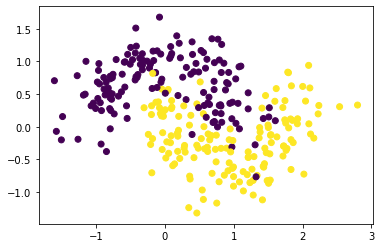

In [4]:
N = 300
x, t = datasets.make_moons(N, noise = 0.3)
plt.scatter(x[:, 0], x[:, 1], c=t)
plt.show()
t = t.reshape(N, 1)
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2)

In [5]:
model = Sequential()
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = optimizer = optimizers.SGD(learning_rate=0.1)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, t_train, epochs=200, batch_size=10, verbose=1)

In [ ]:
for i in range(120):
    for j in range(120):
        x_ = np.array([[(i-60)*0.05, (j-60)*0.05]])
        m = model(x_)
        print(m[0, 0])
        if m[0, 0] > 0.5:
            plt.fill([x_[0, 0], x_[0, 0], x_[0, 0]+0.05, x_[0, 0]+0.05], [x_[0, 1], x_[0, 1]+0.05, x_[0, 1]+0.05, x_[0, 1]],color="y",alpha=0.2)
        else:
             plt.fill([x_[0, 0], x_[0, 0], x_[0, 0]+0.05, x_[0, 0]+0.05], [x_[0, 1], x_[0, 1]+0.05, x_[0, 1]+0.05, x_[0, 1]],color="g",alpha=0.2)

plt.scatter(x_test[:, 0], x_test[:, 1], c=t_test.T[0])
plt.show()